In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from obspy.geodetics import degrees2kilometers
from scipy.spatial import distance
import os

In [2]:
df= pd.read_csv('data/differences.csv')

In [3]:
# add column for reference lap
df['Reference'] = df.apply(lambda row: 'ref1.csv' if 'lap1' in row['Name'] else 'ref2.csv', axis=1)

In [4]:
# reorder columns
df = df[['Name', 'Reference', 'Measurements count', 'Frechet distance', 'Curve length measure', 
         'Area diff', 'Average distance from reference lap (cm)']]

In [5]:
ref1 = pd.read_csv('data/ref1_v2.csv')
ref2 = pd.read_csv('data/ref2_v2.csv')

In [6]:
df[df['Reference'] == 'ref1.csv'].sort_values(['Frechet distance']).head()
# possible condition for 5%: Frechet distance < 0.000055

,Name,Reference,Measurements count,Frechet distance,Curve length measure,Area diff,Average distance from reference lap (cm)
12,lap1-2.csv,ref1.csv,2371,0.000051,0.000190,0.000006,111.751394
9,lap1-17.csv,ref1.csv,1001,0.000052,0.000060,0.000005,113.116325
2,lap1-10.csv,ref1.csv,1261,0.000052,0.000072,0.000006,112.402981
11,lap1-19.csv,ref1.csv,1088,0.000053,0.000062,0.000005,112.335056
28,lap1-4.csv,ref1.csv,1355,0.000053,0.000065,0.000006,114.349087


[]

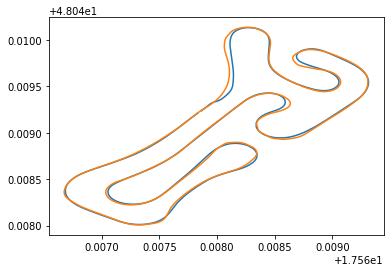

In [7]:
lap = pd.read_csv('data/laps/lap1-2.csv')
fig = plt.figure()
plt.plot(ref1['LON'], ref1['LAT'])
plt.plot(lap['LON'], lap['LAT'])
plt.plot()

In [8]:
df[df['Reference'] == 'ref2.csv'].sort_values(['Frechet distance']).head()
# Frechet distance < 0.000055

,Name,Reference,Measurements count,Frechet distance,Curve length measure,Area diff,Average distance from reference lap (cm)
51,lap3-0.csv,ref2.csv,1229,0.000023,0.000027,1.040000e-06,58.305860
34,lap2-0.csv,ref2.csv,1130,0.000037,0.000079,2.040000e-07,61.112451
46,lap2-5.csv,ref2.csv,1529,0.000049,0.000178,2.510000e-06,41.562587
45,lap2-4.csv,ref2.csv,1304,0.000052,0.000088,1.580000e-06,54.772073
38,lap2-12.csv,ref2.csv,1174,0.000052,0.000076,7.530000e-07,39.031483


[]

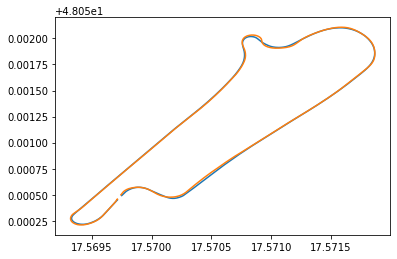

In [9]:
lap = pd.read_csv('data/laps/lap3-0.csv')
fig = plt.figure()
plt.plot(ref2['LON'], ref2['LAT'])
plt.plot(lap['LON'], lap['LAT'])
plt.plot()

In [10]:
df[(df['Reference'] == 'ref1.csv')].sort_values(['Area diff']).head()
# Area diff turned out not to be the best choice, since the uglyincomplete laps have 
# the smallest area diff (lap1-33, lap1-14)

,Name,Reference,Measurements count,Frechet distance,Curve length measure,Area diff,Average distance from reference lap (cm)
19,lap1-26.csv,ref1.csv,556,0.000067,0.000049,0.000002,166.321978
27,lap1-33.csv,ref1.csv,145,0.001491,0.000569,0.000003,8789.269252
6,lap1-14.csv,ref1.csv,224,0.001495,0.000544,0.000004,7069.204869
7,lap1-15.csv,ref1.csv,981,0.000064,0.000078,0.000004,117.894379
25,lap1-31.csv,ref1.csv,953,0.000057,0.000060,0.000004,114.282277


In [11]:
df[df['Reference'] == 'ref2.csv'].sort_values(['Area diff']).head()
# same as above, just the ugly laps are not all in the top 5 but they are pretty high in the table

,Name,Reference,Measurements count,Frechet distance,Curve length measure,Area diff,Average distance from reference lap (cm)
34,lap2-0.csv,ref2.csv,1130,0.000037,0.000079,2.040000e-07,61.112451
39,lap2-13.csv,ref2.csv,1110,0.000054,0.000050,2.120000e-07,42.109291
53,lap3-2.csv,ref2.csv,1266,0.000055,0.000071,6.920000e-07,62.825328
38,lap2-12.csv,ref2.csv,1174,0.000052,0.000076,7.530000e-07,39.031483
43,lap2-2.csv,ref2.csv,1202,0.000053,0.000078,9.080000e-07,57.883279


In [12]:
# NOTE: ugly laps
# 1-1, 1-13, 1-14, 1-30, 1-32, 1-33
# 2-13, 2-14, 2-15, 2-16
# 3-1, 3-3, 3-4

In [13]:
df[df['Reference'] == 'ref1.csv'].sort_values(['Average distance from reference lap (cm)']).head()
# this last metric provides probably the best comparison between the laps

,Name,Reference,Measurements count,Frechet distance,Curve length measure,Area diff,Average distance from reference lap (cm)
24,lap1-30.csv,ref1.csv,1043,0.000059,0.000122,0.000004,105.688772
32,lap1-8.csv,ref1.csv,1241,0.000054,0.000057,0.000005,109.445696
16,lap1-23.csv,ref1.csv,1101,0.000060,0.000065,0.000006,110.627815
3,lap1-11.csv,ref1.csv,1197,0.000053,0.000063,0.000005,110.668834
17,lap1-24.csv,ref1.csv,957,0.000056,0.000053,0.000004,111.300853


[]

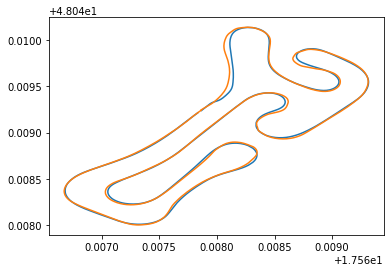

In [14]:
# top real lap reference 1
lap = pd.read_csv('data/laps/lap1-8.csv')
fig = plt.figure()
plt.plot(ref1['LON'], ref1['LAT'])
plt.plot(lap['LON'], lap['LAT'])
plt.plot()

In [15]:
df[df['Reference'] == 'ref2.csv'].sort_values(['Average distance from reference lap (cm)']).head()

,Name,Reference,Measurements count,Frechet distance,Curve length measure,Area diff,Average distance from reference lap (cm)
36,lap2-10.csv,ref2.csv,1461,0.000054,0.000118,2.080000e-06,36.071014
48,lap2-7.csv,ref2.csv,1241,0.000055,0.000079,1.260000e-06,37.225944
47,lap2-6.csv,ref2.csv,1363,0.000053,0.000095,1.810000e-06,38.722751
37,lap2-11.csv,ref2.csv,1525,0.000054,0.000135,2.410000e-06,38.744236
38,lap2-12.csv,ref2.csv,1174,0.000052,0.000076,7.530000e-07,39.031483


[]

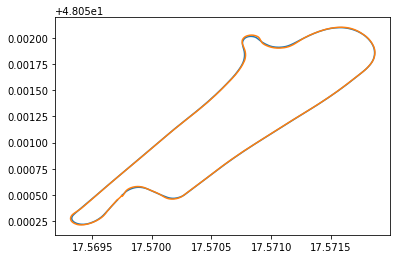

In [16]:
# top real lap reference 2
lap = pd.read_csv('data/laps/lap2-10.csv')
fig = plt.figure()
plt.plot(ref2['LON'], ref2['LAT'])
plt.plot(lap['LON'], lap['LAT'])
plt.plot()

There's no pretty way how to determine average command from multiple pretty laps when the laps consists of different numbers of points, therefore output commands are determined by 1 nice lap according to he average distance from the reference lap

## Training data preprocessing

In [43]:
error_laps = ['lap1-13.csv', 'lap1-14.csv', 'lap1-33.csv', 'lap2-14.csv', 'lap2-15.csv', 'lap2-16.csv', 
              'lap3-1.csv', 'lap3-3.csv', 'lap3-4.csv']
top_laps = ['lap1-8.csv', 'lap2-10.csv']

In [44]:
files = list()

# list all lap files
for r, d, f in os.walk('data/laps'):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))


top_ref1 = pd.read_csv('data/laps/lap1-8.csv')
top_ref2 = pd.read_csv('data/laps/lap2-10.csv')

In [45]:
columns = ['dx', 'dy', 'crs1', 'crs2', 'speed', 'cmd', 'new cmd']
data = pd.DataFrame(columns=columns)

In [46]:
def new_command(file, row):
    if file.split('/')[-1] in top_laps:
        return row['CMD']
    
    if 'data/laps/lap1' in file:
        ref = top_ref1
    else:
        ref = top_ref2
        
    min_dist = 1000000
    min_index = 0
    for index, ref_row in ref.iterrows():
        dist = distance.euclidean([row['LON'], row['LAT']], [ref_row['LON'], ref_row['LAT']])    
        if dist < min_dist:
            min_dist = dist
            min_index = index
            
    return ref['CMD'][min_index]

In [47]:
for file in files:
    # just don't include the extremely crazy laps and also lap1-0, that will be handled later
    if file.split('/')[-1] in error_laps or file.split('/')[-1] == 'lap1-0.csv':
        continue
        
    file_df = pd.read_csv(file)
    for index, row in file_df.iterrows():
        new_row = pd.DataFrame([[
                    row['NLON'] - row['LON'],
                    row['NLAT'] - row['LAT'],
                    row['CRS'],
                    row['NCRS'],
                    row['GSPEED'],
                    row['CMD'],
                    new_command(file, row)
                ]], columns=columns)
        
        data = data.append(new_row, ignore_index=True)
    
    print('done with {}'.format(file))
    

done with data/laps/lap2-3.csv
done with data/laps/lap1-11.csv
done with data/laps/lap1-21.csv
done with data/laps/lap1-23.csv
done with data/laps/lap2-12.csv
done with data/laps/lap1-18.csv
done with data/laps/lap1-31.csv
done with data/laps/lap2-9.csv
done with data/laps/lap1-27.csv
done with data/laps/lap2-0.csv
done with data/laps/lap1-24.csv
done with data/laps/lap1-30.csv
done with data/laps/lap1-22.csv
done with data/laps/lap1-16.csv
done with data/laps/lap1-5.csv
done with data/laps/lap1-1.csv
done with data/laps/lap2-4.csv
done with data/laps/lap2-6.csv
done with data/laps/lap2-1.csv
done with data/laps/lap1-17.csv
done with data/laps/lap2-10.csv
done with data/laps/lap2-11.csv
done with data/laps/lap1-32.csv
done with data/laps/lap1-3.csv
done with data/laps/lap1-10.csv
done with data/laps/lap1-2.csv
done with data/laps/lap2-13.csv
done with data/laps/lap1-4.csv
done with data/laps/lap2-8.csv
done with data/laps/lap1-9.csv
done with data/laps/lap1-29.csv
done with data/laps/l

In [48]:
# remove crazy mess from the beginning of the lap1-0.csv and append it to the dataframe
lap1_0 = pd.read_csv('data/laps/lap1-0.csv')
lap1_0 = lap1_0.iloc[1000:]

for index, row in lap1_0.iterrows():
    new_row = pd.DataFrame([[
                row['NLON'] - row['LON'],
                row['NLAT'] - row['LAT'],
                row['CRS'],
                row['NCRS'],
                row['GSPEED'],
                row['CMD'],
                new_command('data/laps/lap1-0.csv', row)
            ]], columns=columns)
        
    data = data.append(new_row, ignore_index=True)

In [50]:
data

,dx,dy,crs1,crs2,speed,cmd,new cmd
0,-1.500000e-06,-0.000002,207.45010,208.85762,2.45,7.768305,4.292179
1,-1.400000e-06,-0.000002,208.85762,210.04628,2.29,7.423324,2.982319
2,-1.300000e-06,-0.000002,210.04628,208.65510,2.21,-0.551265,2.982319
3,-2.900000e-06,-0.000004,208.65510,210.05959,2.09,12.998049,6.283408
4,-9.000000e-07,-0.000001,210.05959,207.29420,1.94,-5.802856,13.028407
...,...,...,...,...,...,...,...
56425,-5.200000e-06,-0.000004,220.65632,220.74945,6.61,-0.424533,-0.179385
56426,-4.900000e-06,-0.000004,220.74945,221.10654,6.07,-0.266280,-6.195389
56427,-4.500000e-06,-0.000004,221.10654,221.55495,5.82,0.228884,-2.052994
56428,-4.000000e-06,-0.000003,221.55495,220.36920,5.30,-2.888971,-6.568616


In [51]:
data.to_csv('data/nn_data.csv', index=False)